In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as Axes
import seaborn as sns
from sklearn import preprocessing

In [109]:
df = pd.read_csv('la_12_17_merged.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1_x,state,id,county,newspaper,date,notice_id,count_tags,combinations,...,DOMESTIC_MIG,NET_MIG,RESIDUAL,GQ_ESTIMATES,R_birth,R_death,R_NATURAL_INC,R_INTERNATIONAL_MIG,R_DOMESTIC_MIG,R_NET_MIG
0,0,511,Louisiana,346/172013_19770781,Lincoln,The Ruston Daily Leader,2013-01-08 00:00:00,19770781.0,3,1-Bids_Proposal_Purchase,...,-124.0,15.0,1.0,4917.0,12.56316,8.177706,4.385454,2.944822,-2.627035,0.317787
1,1,519,Louisiana,346/172013_19770782,Lincoln,The Ruston Daily Leader,2013-01-08 00:00:00,19770782.0,2,2-Auctions_Liquor,...,-124.0,15.0,1.0,4917.0,12.56316,8.177706,4.385454,2.944822,-2.627035,0.317787
2,2,527,Louisiana,346/172013_19770783,Lincoln,The Ruston Daily Leader,2013-01-08 00:00:00,19770783.0,2,2-Auctions_Liquor,...,-124.0,15.0,1.0,4917.0,12.56316,8.177706,4.385454,2.944822,-2.627035,0.317787
3,3,748436,Louisiana,346/122013_19753115,Lincoln,The Ruston Daily Leader,2013-01-02 00:00:00,19753115.0,1,Purchase,...,-124.0,15.0,1.0,4917.0,12.56316,8.177706,4.385454,2.944822,-2.627035,0.317787
4,4,754155,Louisiana,346/172013_19770769,Lincoln,The Ruston Daily Leader,2013-01-04 00:00:00,19770769.0,6,1-Bids_Construction_Contractor_License_Meeting...,...,-124.0,15.0,1.0,4917.0,12.56316,8.177706,4.385454,2.944822,-2.627035,0.317787


In [0]:
df['count']=df.groupby(['county','combinations_clean', 'year', 'month']).combinations_clean.transform('count')

In [111]:
print(len(df))
df.drop_duplicates(['county','notice_id'],inplace=True)
print(len(df))

305217
294391


In [0]:
df['count_pop'] = df['count']*10000/df['POP_ESTIMATE']

In [113]:
str(sorted(df.county.unique()))

"['Acadia', 'Ascension', 'Assumption', 'Beauregard', 'Bienville', 'Bossier', 'Caddo', 'Caldwell', 'Cameron', 'Catahoula', 'Claiborne', 'Concordia', 'DeSoto', 'East Baton Rouge', 'Evangeline', 'Franklin', 'Grant', 'Iberia', 'Iberville', 'Jackson', 'Jefferson', 'Lafayette', 'Lafourche', 'Lincoln', 'Livingston', 'Madison', 'Morehouse', 'Natchitoches', 'Orleans', 'Ouachita', 'Rapides', 'Richland', 'Sabine', 'St. Bernard', 'St. Charles', 'St. James', 'St. John', 'St. Landry', 'St. Tammany', 'Tangipahoa', 'Terrebonne', 'Union', 'Vermilion', 'Vernon', 'Washington', 'Webster', 'West Feliciana', 'Winn']"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


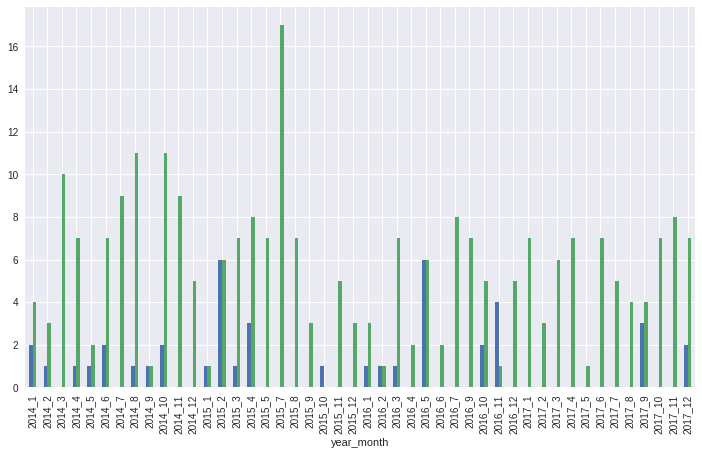

In [114]:
# temp_df = df
temp_df = df[df['combinations_clean'].isin(['1-Bids_2-Auctions_3-Property_4-Foreclosure',
                                                           '1-Bids_2-Auctions_3-Property_4-Foreclosure_5-Default',
                                                           '1-Summon_2-Foreclosure'])]
temp_df["year_month"] = [str(temp_df["year"].values[i]) + "_" + str(temp_df["month"].values[i]) for i in range(len(temp_df))]

# temp_df = temp_df[temp_df['county'].isin(['Carson','Douglas','Churchill'])]

temp_df = temp_df[temp_df['year'].isin(['2014','2015','2016','2017'])]
pv = pd.pivot_table(temp_df, index=temp_df.year_month, columns=temp_df.combinations_clean,
                    values='count_pop', aggfunc='count')

# pv = pd.pivot_table(temp_df, index=temp_df.month, columns=temp_df.year,
#                     values='count', aggfunc='count')

day_order = ['2014_1', '2014_2', '2014_3', '2014_4', '2014_5', '2014_6', '2014_7', '2014_8', '2014_9', '2014_10', '2014_11', '2014_12',
            '2015_1', '2015_2', '2015_3', '2015_4', '2015_5', '2015_7', '2015_8', '2015_9', '2015_10', '2015_11', '2015_12',
             '2016_1', '2016_2', '2016_3', '2016_4', '2016_5', '2016_6', '2016_7', '2016_9', '2016_10', '2016_11', '2016_12',
            '2017_1', '2017_2', '2017_3', '2017_4', '2017_5', '2017_6', '2017_7', '2017_8', '2017_9', '2017_10', '2017_11', '2017_12']
ax = pv.reindex(day_order).plot(kind="bar", legend=False)
# plt.axvspan(9, 14, color='red', alpha=0.5)
plt.show()
# plt.plot(pv)
# print(pv)

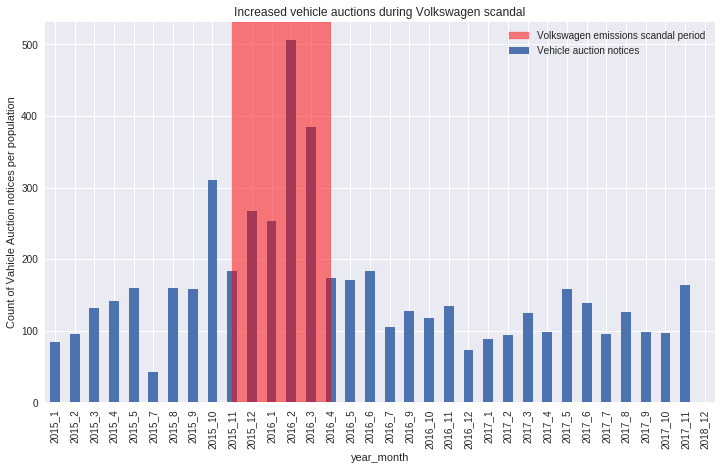

In [85]:
import numpy as np
floodCounties = ['Acadia', 'Ascension', 'Avoyelles', 'East Baton Rouge', 'East Feliciana', 'Evangeline',
                 'Iberia', 'Iberville', 'Jefferson Davis', 'Lafayette', 'Livingston', 'Pointe Coupee', 
                 'St. Helena', 'St. Landry', 'St. Martin', 'St. Tammany', 'Tangipahoa', 'Vermilion', 'Washington', 'West Feliciana']
temp_df = df
temp_df = df[df['combinations_clean'].isin(['1-Bids_2-Auctions_3-Vehicle'])]


temp_df = temp_df[temp_df['year'].isin(['2015','2016','2017'])]
temp_df["year_month"] = [str(temp_df["year"].values[i]) + "_" + str(temp_df["month"].values[i]) for i in range(len(temp_df))]

scaler = preprocessing.MinMaxScaler()
temp_df[['count_pop']] = scaler.fit_transform(temp_df[['count_pop']])

pv = pd.pivot_table(temp_df, index=temp_df.year_month, columns=temp_df.combinations_clean,
                    values='count_pop', aggfunc='count')

plt.rcParams['figure.figsize']=(12,7)

day_order = ['2015_1', '2015_2', '2015_3', '2015_4', '2015_5', '2015_7', '2015_8', '2015_9', '2015_10', '2015_11', '2015_12',
             '2016_1', '2016_2', '2016_3', '2016_4', '2016_5', '2016_6', '2016_7', '2016_9', '2016_10', '2016_11', '2016_12',
            '2017_1', '2017_2', '2017_3', '2017_4', '2017_5', '2017_6', '2017_7', '2017_8', '2017_9', '2017_10', '2017_11', '2018_12']
ax = pv.reindex(day_order).plot(kind="bar", label='Vehicle auction notices', legend=True)
plt.ylabel('Count of Vahicle Auction notices per population')
plt.axvspan(9, 14, color='red', alpha=0.5, label='Volkswagen emissions scandal period')
plt.title('Increased vehicle auctions during Volkswagen scandal')
plt.legend(['Volkswagen emissions scandal period','Vehicle auction notices'])
plt.show()

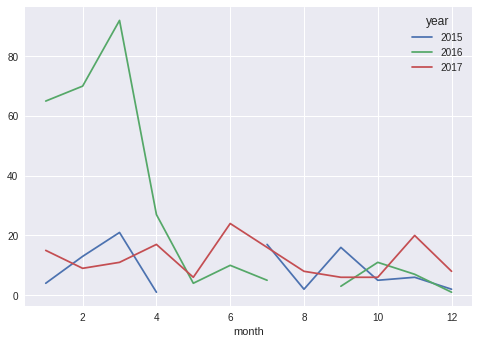

In [0]:
import numpy as np
floodCounties = ['Acadia', 'Ascension', 'Avoyelles', 'East Baton Rouge', 'East Feliciana', 'Evangeline',
                 'Iberia', 'Iberville', 'Jefferson Davis', 'Lafayette', 'Livingston', 'Pointe Coupee', 
                 'St. Helena', 'St. Landry', 'St. Martin', 'St. Tammany', 'Tangipahoa', 'Vermilion', 'Washington', 'West Feliciana']

# temp_df = df[df['combinations_clean'].isin(['Contractor',
#  'Construction_Contractor','Construction_Council','Construction'])]
temp_df = temp_df[temp_df['county'].isin(floodCounties)]
temp_df = temp_df[temp_df['year'].isin(['2015','2016','2017'])]

temp_df["year_month"] = [str(temp_df["year"].values[i]) + "_" + str(temp_df["month"].values[i]) for i in range(len(temp_df))]
scaler = preprocessing.MinMaxScaler()
temp_df[['count_pop']] = scaler.fit_transform(temp_df[['count_pop']])

pv = pd.pivot_table(temp_df, index=temp_df.month, columns=temp_df.year,
                    values='count_pop', aggfunc='count')

pv.plot()
# print(pv)
# temp_df.head()

year   2015  2016  2017
month                  
1       6.0  16.0   NaN
2       3.0  30.0   4.0
3       2.0  27.0  16.0
4       4.0   NaN   5.0
5       1.0   NaN   1.0
6       NaN   5.0   5.0
7       1.0   3.0   4.0
8       6.0   NaN   3.0
9       8.0   6.0   1.0
10      9.0   2.0  21.0
11      5.0   NaN  10.0
12     14.0   4.0  28.0


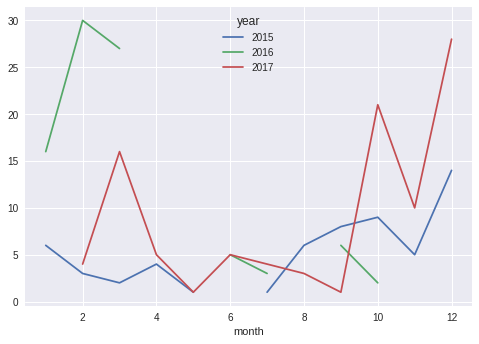

In [0]:
floodCounties = ['Acadia', 'Ascension', 'Avoyelles', 'East Baton Rouge', 'East Feliciana', 'Evangeline',
                 'Iberia', 'Iberville', 'Jefferson Davis', 'Lafayette', 'Livingston', 'Pointe Coupee', 
                 'St. Helena', 'St. Landry', 'St. Martin', 'St. Tammany', 'Tangipahoa', 'Vermilion', 'Washington', 'West Feliciana']
temp_df = df
temp_df = df[df['combinations_clean'].isin(['1-Parenting_2-Adoption','Adoption'])]
# temp_df = temp_df[~temp_df['county'].isin(floodCounties)]
temp_df = temp_df[temp_df['year'].isin(['2015','2016','2017'])]

scaler = preprocessing.MinMaxScaler()
temp_df[['count_pop']] = scaler.fit_transform(temp_df[['count_pop']])

pv = pd.pivot_table(temp_df, index=temp_df.month, columns=temp_df.year,
                    values='count_pop', aggfunc='count')
pv.plot()
print(pv)
# temp_df.head()

year          2015         2016        2017
month                                      
1      160400806.0  145465219.0  77700278.0
2      181479827.0  122906752.0  61277808.0
3      193001208.0  128388995.0  70222716.0
4      182448417.0   98285206.0  64571014.0
5      104728779.0  121691204.0  94938701.0
6              NaN  123788163.0  65362826.0
7       42823778.0   59609425.0  37566713.0
8      116480178.0          NaN  45671409.0
9      123657424.0  112988414.0  38230206.0
10     152242929.0  123507266.0  29154500.0
11     117376109.0   87420058.0  30028651.0
12     145576598.0   95619134.0  31103780.0


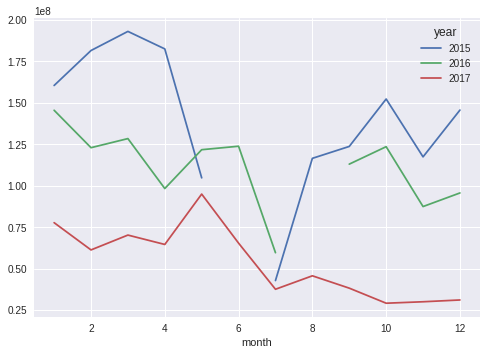

In [0]:
temp_df = df
temp_df = df[df['combinations_clean'].isin(['1-Bids_2-Auctions_3-Property_4-Foreclosure',
                                                           '1-Bids_2-Auctions_3-Property_4-Foreclosure_5-Default',
                                                           '1-Summon_2-Foreclosure'])]
temp_df = temp_df[temp_df['county'].isin(['Elko','Clark'])]
temp_df = temp_df[temp_df['year'].isin(['2015','2016','2017'])]
pv = pd.pivot_table(temp_df, index=temp_df.month, columns=temp_df.year,
                    values='count', aggfunc='sum')

pv.plot()
print(pv)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


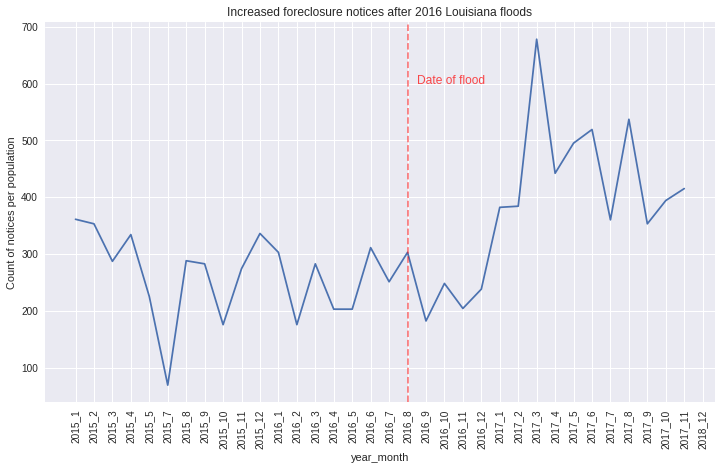

In [107]:
import numpy as np
floodCounties = ['Acadia', 'Ascension', 'Avoyelles', 'East Baton Rouge', 'East Feliciana', 'Evangeline',
                 'Iberia', 'Iberville', 'Jefferson Davis', 'Lafayette', 'Livingston', 'Pointe Coupee', 
                 'St. Helena', 'St. Landry', 'St. Martin', 'St. Tammany', 'Tangipahoa', 'Vermilion', 'Washington', 'West Feliciana']
temp_df = df
temp_df = df[df['combinations_clean'].str.contains('1-Bids_2-Auctions_3-Property-4-Foreclosure')]
temp_df = temp_df[temp_df['county'].isin(floodCounties)]

temp_df = temp_df[temp_df['year'].isin(['2015','2016','2017'])]
temp_df["year_month"] = [str(temp_df["year"].values[i]) + "_" + str(temp_df["month"].values[i]) for i in range(len(temp_df))]

scaler = preprocessing.MinMaxScaler()
temp_df[['count_pop']] = scaler.fit_transform(temp_df[['count_pop']])

pv = pd.pivot_table(temp_df, index=temp_df.year_month, columns=temp_df.combinations_clean,
                    values='count_pop', aggfunc='count')
pv.ix['2016_1'] = 302.7179
pv.ix['2016_2'] = 175.444
pv.ix['2016_3'] = 282.532
pv.ix['2016_4'] = 202.7179
pv.ix['2016_5'] = 202.7179
pv.ix['2016_8'] = 302.7179
pv.ix['2015_10'] = 175.444
pv.ix['2015_9'] = 282.532

day_order = ['2015_1', '2015_2', '2015_3', '2015_4', '2015_5', '2015_7', '2015_8', '2015_9', '2015_10', '2015_11', '2015_12',
             '2016_1', '2016_2', '2016_3', '2016_4', '2016_5', '2016_6', '2016_7', '2016_8','2016_9', '2016_10', '2016_11', '2016_12',
            '2017_1', '2017_2', '2017_3', '2017_4', '2017_5', '2017_6', '2017_7', '2017_8', '2017_9', '2017_10', '2017_11', '2018_12']

ax = pv.reindex(day_order).plot(kind="line", legend=False)

# plt.axvspan(22, 31, color='g', alpha=0.5, label='increased foreclosures')
plt.axvline(18, color='r', label='Date of Flood', linestyle='dashed', alpha=0.5)
plt.xticks(list(range(0,len(day_order))),day_order, rotation=90)
plt.ylabel('Count of notices per population')
plt.title('Increased foreclosure notices after 2016 Louisiana floods')
plt.text(x = 18.5, y = 600, s = 'Date of flood', color='r', alpha=0.7)
# plt.legend(['Count of notices','Date of flood'])
plt.show()
# display(pv)
# print(range(day_order))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


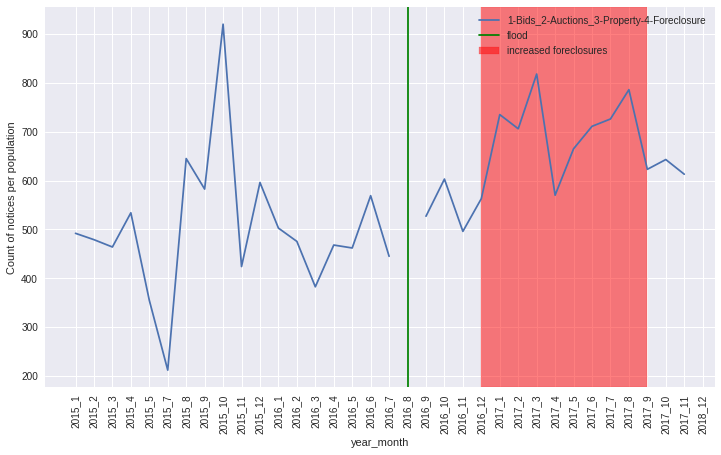

In [115]:
import numpy as np
floodCounties = ['Acadia', 'Ascension', 'Avoyelles', 'East Baton Rouge', 'East Feliciana', 'Evangeline',
                 'Iberia', 'Iberville', 'Jefferson Davis', 'Lafayette', 'Livingston', 'Pointe Coupee', 
                 'St. Helena', 'St. Landry', 'St. Martin', 'St. Tammany', 'Tangipahoa', 'Vermilion', 'Washington', 'West Feliciana']
temp_df = df
temp_df = df[df['combinations_clean'].str.contains('1-Bids_2-Auctions_3-Property-4-Foreclosure')]
temp_df = temp_df[~temp_df['county'].isin(floodCounties)]

temp_df = temp_df[temp_df['year'].isin(['2015','2016','2017'])]
temp_df["year_month"] = [str(temp_df["year"].values[i]) + "_" + str(temp_df["month"].values[i]) for i in range(len(temp_df))]

scaler = preprocessing.MinMaxScaler()
temp_df[['count_pop']] = scaler.fit_transform(temp_df[['count_pop']])

pv = pd.pivot_table(temp_df, index=temp_df.year_month, columns=temp_df.combinations_clean,
                    values='count_pop', aggfunc='count')

day_order = ['2015_1', '2015_2', '2015_3', '2015_4', '2015_5', '2015_7', '2015_8', '2015_9', '2015_10', '2015_11', '2015_12',
             '2016_1', '2016_2', '2016_3', '2016_4', '2016_5', '2016_6', '2016_7', '2016_8','2016_9', '2016_10', '2016_11', '2016_12',
            '2017_1', '2017_2', '2017_3', '2017_4', '2017_5', '2017_6', '2017_7', '2017_8', '2017_9', '2017_10', '2017_11', '2018_12']

ax = pv.reindex(day_order).plot(kind="line", legend=False)

plt.axvspan(22, 31, color='r', alpha=0.5, label='increased foreclosures')
plt.axvline(18, color='g', label='flood')
plt.xticks(list(range(0,len(day_order))),day_order, rotation=90)
plt.ylabel('Count of notices per population')
plt.legend()
plt.show()
# display(pv)
# print(range(day_order))